# Skalierung von Koordinatenlisten

Nehmen wir an, Sie haben eine Liste von Koordinaten, die von einem Bild abgeleitet wurden. Falls das Bild eine spezifizierte Pixelgröße hat, können Sie Pixelkoordinaten in physische Koordinaten umwandeln.

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import stackview

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
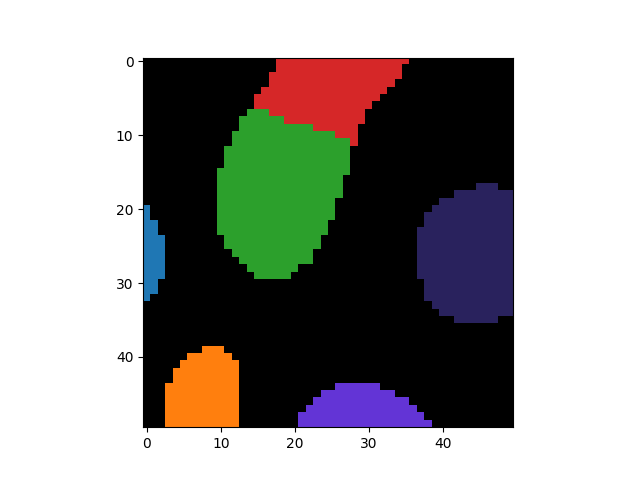

In [2]:
image = imread("../../data/blobs.tif")[:50,:50]

label_image = cle.voronoi_otsu_labeling(image, spot_sigma=4)

label_image

Von den Objekten in diesem Labelbild können wir Schwerpunktkoordinaten ableiten.

In [3]:
centroids = cle.centroids_of_labels(label_image)
centroids

cl.OCLArray([[ 0.7586207,  7.7894735, 17.849672 , 24.59091  , 29.01266  ,
        43.57143  ],
       [26.275862 , 44.63158  , 17.79085  ,  4.071429 , 47.02532  ,
        26.266666 ]], dtype=float32)

Eine solche Punktliste hat d mal n Zahlen für d Dimensionen (üblicherweise 2 oder 3) und n Punkte.

In [4]:
centroids.shape

(2, 6)

Falls die Pixelgröße bekannt ist, können wir die Schwerpunktkoordinaten in physischen Einheiten berechnen.

In [5]:
pixel_size_in_microns = [0.1, 0.1]

In [6]:
centroids_in_microns = centroids * cle.asarray([pixel_size_in_microns]).T

centroids_in_microns

cl.OCLArray([[0.07586207, 0.77894735, 1.7849673 , 2.459091  , 2.9012659 ,
        4.357143  ],
       [2.6275861 , 4.463158  , 1.779085  , 0.40714288, 4.702532  ,
        2.6266668 ]], dtype=float32)